In [33]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt 
from numpy import ndarray
import random

In [153]:
def experiment( device_num = 40):
    test_second = 30    
    hopping_rate = 1600 # 1600 hops per second
    hopping_times = test_second * hopping_rate
    No_noises_channels_num = 39
   
    device= [[0] * (hopping_times*2)] * device_num
    total_channel_index_collision = [[0] * 80] * 10
    channel_index_collision = [0] * 80
    pattern = [[0] * (hopping_times*2) ] * 40
    threshold = [0] * 10
    for i in range(9):
        threshold[i+1] = (i+1) / 10
    del(threshold[0])
    num_time = -1
    collision = [0]*9
    channel = [0] * 80
    for thr in (threshold):
        num_time += 1
        print(thr)
        #init
        collision_num = 0
        for i in range(79) :
            channel_index_collision[i+1] = 0
            channel[i] = 0
        #possion fetch badchannel 
        noises_channels_num = 40
        probability = 0.5
        badchannel_num = np.random.poisson(noises_channels_num * probability)

        for _ in range(badchannel_num):
            channel[random.randrange(1, noises_channels_num)] = 2   # assume 2 represent for bad channel
        
        #fetch pattern
        for i in range(40):
            random.seed()
            seed = random.randrange(0,79)
            random.seed(seed)
            for j in range(hopping_times*2):
                pattern[i][j] = random.randrange(0,79)
        
        record_badchannel= [0] * 80
        for i in range(80):
                record_badchannel[i] = channel[i]
        for i in range(5*1600):
            for device_index in range(device_num) :
                # fetch channel
                fetch_channel = pattern[device_index][i] + 1
                device[device_index][i] = fetch_channel
                # detect collision or bad channel
                if channel[fetch_channel] != 0:
                    collision_num = collision_num + 1
                    total_channel_index_collision[num_time][fetch_channel] += 1
                    if channel[fetch_channel] !=2 : #collision
                        channel_index_collision[fetch_channel] += 1
                if channel[fetch_channel] == 0:
                    channel[fetch_channel] = 1
                elif channel[fetch_channel] == 1:
                    channel[fetch_channel] = 3
                elif channel[fetch_channel] == 2:
                    channel[fetch_channel] = 4
            for i in range(80):
                channel[i] = record_badchannel[i]
        tem = 0
        for i in range(79) :
            total_channel_index_collision[num_time][i+1] = channel_index_collision[i+1] / (5*1600)
            channel_index_collision[i+1] = channel_index_collision[i+1] / (5*1600)
            tem += channel_index_collision[i+1]
        print( tem/79 )
            
        #update badchannel
        for i in range(79) :
            if channel_index_collision[i+1] > thr:
                channel[i] = 2   # assume 2 represent for bad channel
        for i in range(79) :
            total_channel_index_collision[num_time][i+1] = channel_index_collision[i+1] * (5*1600)
            channel_index_collision[i+1] = channel_index_collision[i+1] * (5*1600)
        for i in range(80):
            record_badchannel[i] = channel[i]
            
        # 30 sec    
        for i in range(5*1600,hopping_times) :
            for device_index in range(device_num) :
                # fetch channel
                fetch_channel = random.randrange(0, 79) + 1
                device[device_index][i] = fetch_channel
                # detect collision or bad channel
                if channel[fetch_channel] != 0:
                    collision_num = collision_num + 1
                    total_channel_index_collision[num_time][fetch_channel] += 1
                    if channel[fetch_channel] !=2 : #collision
                        channel_index_collision[fetch_channel] += 1
                if channel[fetch_channel] == 0:
                    channel[fetch_channel] = 1
                elif channel[fetch_channel] == 1:
                    channel[fetch_channel] = 3
                elif channel[fetch_channel] == 2:
                    channel[fetch_channel] = 4
            for i in range(80):
                channel[i] = record_badchannel[i]
        # another 30 sec
        for i in range(hopping_times,hopping_times*2) :
            for device_index in range(device_num) :
                # fetch channel
                fetch_channel = pattern[device_index][i] + 1
                device[device_index][i] = fetch_channel
                # detect collision or bad channel
                if channel[fetch_channel] != 0 :
                    if channel[fetch_channel-1] == 0:
                        device[device_index][i] = fetch_channel-1
                        fetch_channel = (fetch_channel-1)%80
                    elif channel[(fetch_channel+1) % 80] == 0:
                        device[device_index][i] = fetch_channel+1
                        fetch_channel = (fetch_channel+1)%80
                    else:
                        if channel[fetch_channel] !=2 : #collision
                            channel_index_collision[fetch_channel] += 1
                        collision_num = collision_num + 1
                        total_channel_index_collision[num_time][fetch_channel] += 1
                if channel[fetch_channel] == 0:
                    channel[fetch_channel] = 1
                elif channel[fetch_channel] == 1:
                    channel[fetch_channel] = 3
                elif channel[fetch_channel] == 2:
                    channel[fetch_channel] = 4
            for i in range(80):
                channel[i] = record_badchannel[i]
        for i in range(79) :
                total_channel_index_collision[num_time][i+1] = channel_index_collision[i+1] / (hopping_times*2)
                channel_index_collision[i+1] = channel_index_collision[i+1] / (hopping_times*2)
        collision[num_time] = collision_num/(hopping_times*2*device_num)
        print(collision[num_time])
    #plot graph~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    %matplotlib inline
    import seaborn as sns
    import pandas as pd
    import matplotlib.pyplot as plt

    pt = pd.DataFrame(
        {"threshold": threshold,
         "probability of collision": collision
        }

    )
    sns.factorplot(data = pt, x="threshold", y="probability of collision", ci = None, size=10 ,kind="bar",aspect=2 )


0.1
0.4936708860759491
0.9937119791666666
0.2
0.4936708860759494
0.99385
0.3
0.49367088607594944
0.9938111979166667
0.4
0.49367088607594944
0.9893239583333333
0.5
0.49367088607594956
0.81303984375
0.6
0.4936708860759493
0.7017578125
0.7
0.4936708860759497
0.6927403645833333
0.8
0.4936708860759497
0.6880052083333333
0.9
0.49367088607594944
0.7016231770833333


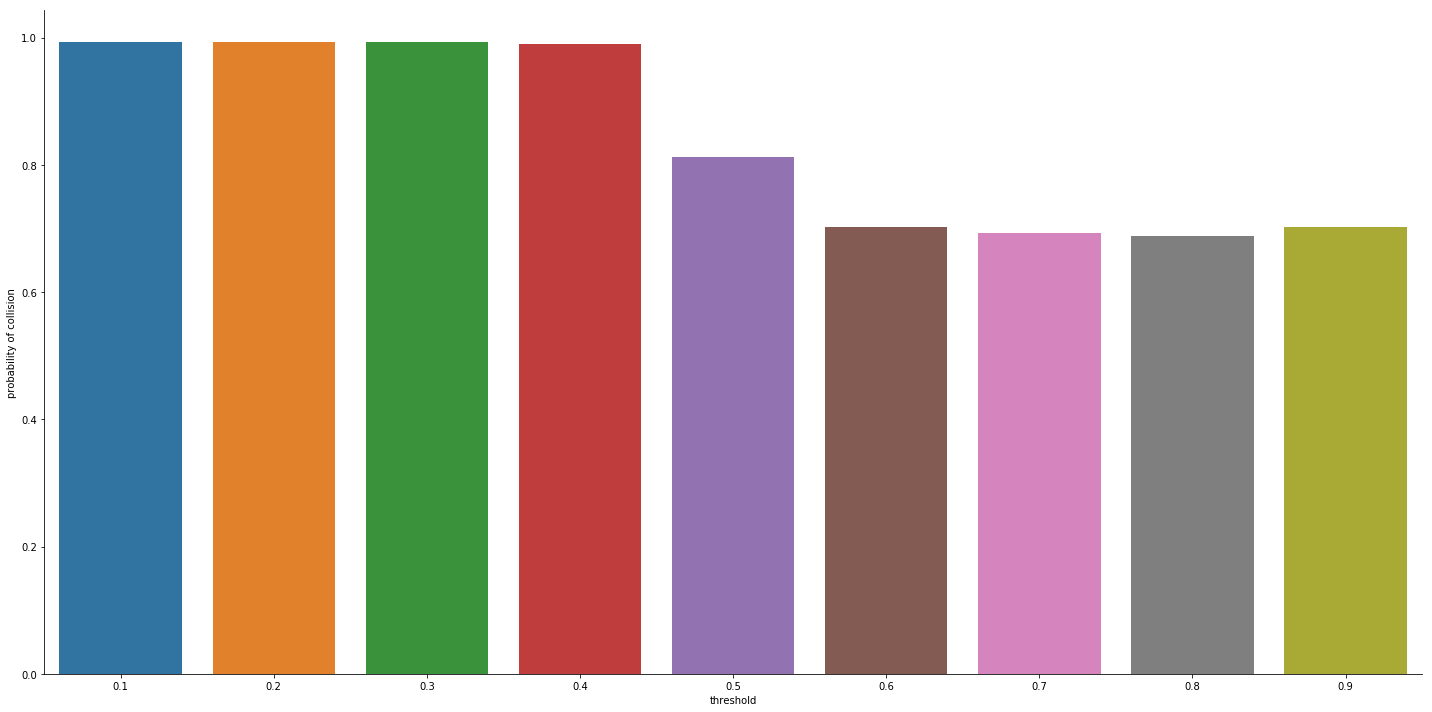

In [154]:
experiment( device_num = 40)

In [205]:
import numpy as np
#fetch pattern
t = [0]*40
for i in range(40):
    random.seed()
    seed = random.randrange(0,79)
    random.seed(seed)
    t[i] = seed
print (t)
counter = [0]*80
for i in range(40):
    counter[t[i]] += 1
for i in range(80):
    if counter[i] == 1:
        counter[i]=0

print(len(np.array(counter).nonzero()[0]))

[48, 66, 14, 66, 23, 65, 24, 47, 59, 19, 9, 32, 20, 56, 30, 59, 8, 36, 56, 60, 1, 51, 10, 54, 44, 29, 59, 37, 55, 50, 40, 47, 10, 74, 26, 78, 0, 5, 66, 71]
5


In [3]:
s

array([-1.19777865e-01, -1.16481988e-01, -4.69103741e-02, -1.24689623e-02,
       -5.49748867e-02,  8.36528016e-02,  2.70934155e-02, -2.30173035e-01,
       -6.15945192e-02, -7.83221967e-03, -4.58086273e-02, -8.47849979e-02,
       -4.45175106e-02, -6.38204607e-02,  5.83635802e-02,  5.82690745e-02,
        1.04731768e-01,  4.54374896e-02, -1.83714305e-01,  1.58561361e-01,
        1.36984547e-01, -1.22536254e-02,  8.64877248e-02, -1.62228876e-01,
       -8.38895696e-02,  1.41422369e-02, -1.49963708e-02,  9.91166428e-02,
       -7.88391309e-02,  2.23544230e-02,  3.81123008e-02,  2.03157293e-01,
       -1.11905249e-01, -1.05403580e-01,  1.60348700e-02, -5.16478639e-02,
       -1.40648457e-01, -2.75570867e-02,  1.01827619e-01, -4.57797198e-02,
        1.39031987e-01, -8.79135517e-03, -9.27713482e-02,  1.97767472e-02,
       -1.12576558e-01, -1.27126100e-01,  2.79482704e-02,  5.36559773e-02,
        2.14189471e-02, -1.39140232e-03, -9.63613838e-02,  1.39960801e-01,
        5.58213417e-02,  